<a href="https://colab.research.google.com/github/ericycheng8/AI4CCEE_Fall_2024/blob/main/mini_project/MiniProject_1/Submission/Yi_(Eric)_Cheng_Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use OpenStreetMap to identify multilane arterial roads in Iowa.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4
    Uninstalling networkx-3.4:
      Successfully uninstalled networkx-3.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 63 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


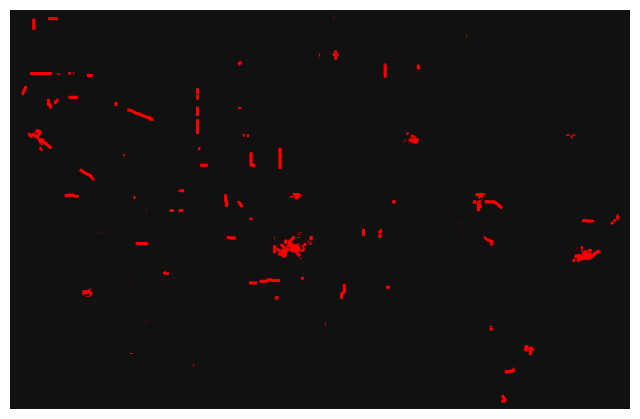

In [ ]:

# Install OSMnx library
!pip install osmnx

# Import libraries
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define a larger area (e.g., the state of Iowa) to encompass more data
area = "Iowa, USA"

# Download the road network for Iowa, keeping only 'primary' and 'secondary' roads to reduce memory usage
# Note: Depending on system resources, consider downloading a smaller subset or simplify the graph to manage memory better
G = ox.graph_from_place(area, network_type='drive', custom_filter='["highway"~"primary|secondary"]')

# Define a function to filter multilane arterial roads
def filter_multilane_roads(G):
    multilane_roads = []
    for u, v, k, data in G.edges(keys=True, data=True):
        lanes = data.get('lanes', 1)  # Default to 1 if 'lanes' tag is missing
        if isinstance(lanes, list):
            lanes = lanes[0] if lanes and isinstance(lanes[0], (int, str)) else 1
        elif isinstance(lanes, str):
            try:
                lanes = int(lanes)
            except ValueError:
                lanes = 1

        if int(lanes) > 2:
            multilane_roads.append((u, v, k))
    return G.edge_subgraph(multilane_roads)

# Filter the road network to only include multilane roads
multilane_G = filter_multilane_roads(G)

# Plot the filtered multilane arterial roads
fig, ax = ox.plot_graph(multilane_G, node_size=0, edge_linewidth=2, edge_color='r')

# Save the multilane arterial roads as a GeoPackage file
ox.save_graph_geopackage(multilane_G, filepath="multilane_roads_iowa.gpkg")

In [ ]:
import geopandas as gpd

# Load the GeoPackage file (replace 'your_file.gpkg' with the actual file path)
gdf = gpd.read_file('/content/multilane_roads_iowa.gpkg')

# Optionally, display the first few rows to understand the data structure
print(gdf.head())

# If you want to export the geometry (latitude and longitude) to CSV,
# convert the geometry column into separate latitude and longitude columns
gdf['longitude'] = gdf.geometry.x
gdf['latitude'] = gdf.geometry.y

# Drop the geometry column if not needed in the CSV
gdf = gdf.drop(columns='geometry')

# Export to a CSV file
gdf.to_csv('output_file.csv', index=False)

# Optionally, display the first few rows of the resulting CSV file to verify
print(gdf.head())

         osmid          y          x  street_count highway  \
0    160391169  42.034727 -91.702198             3           
1   2551533569  41.971004 -91.669563             3           
2  11643207683  41.517339 -94.012532             3           
3    160919553  41.576727 -93.625096             3           
4   1785503752  41.600829 -93.736234             3           

                     geometry  
0  POINT (-91.70220 42.03473)  
1  POINT (-91.66956 41.97100)  
2  POINT (-94.01253 41.51734)  
3  POINT (-93.62510 41.57673)  
4  POINT (-93.73623 41.60083)  
         osmid          y          x  street_count highway  longitude  \
0    160391169  42.034727 -91.702198             3         -91.702198   
1   2551533569  41.971004 -91.669563             3         -91.669563   
2  11643207683  41.517339 -94.012532             3         -94.012532   
3    160919553  41.576727 -93.625096             3         -93.625096   
4   1785503752  41.600829 -93.736234             3         -93.736234 

2. Extract crash data from FARS database, focusing on pedestrian fatalities

In [ ]:
import pandas as pd

# Load the dataset
fars_data = pd.read_csv('/content/Accidents 2015.csv', low_memory=False)

# Check the column names to ensure they are correct (remove this after confirming)
print(fars_data.columns)

# Filter for Iowa (assuming 'STATE' column exists and contains the FIPS code for Iowa which is 19)
iowa_data = fars_data[fars_data['STATE'] == 19]

# Further filter for rows where 'HARM_EVNAME' is 'Pedestrian'
iowa_pedestrian_fatalities = iowa_data[iowa_data['HARM_EVNAME'] == 'Pedestrian']

# Select specific columns: 'STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'FATALS', and 'HOURNAME'
iowa_pedestrian_fatalities_filtered = iowa_pedestrian_fatalities[['STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'HOURNAME','LGT_CONDNAME','HARM_EVNAME','FATALS']]

# Display the first few rows of the filtered data
print(iowa_pedestrian_fatalities_filtered.head())

# Optionally, save the filtered data to a new CSV file
iowa_pedestrian_fatalities_filtered.to_csv('iowa_pedestrian_fatalities_2015.csv', index=False)


Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'CITY', 'DAY',
       'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR', 'DAY_WEEK', 'DAY_WEEKNAME',
       'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'NHS', 'NHSNAME', 'ROUTE',
       'ROUTENAME', 'TWAY_ID', 'TWAY_ID2', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'MILEPT',
       'MILEPTNAME', 'LATITUDE', 'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME',
       'SP_JUR', 'SP_JURNAME', 'HARM_EV', 'HARM_EVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME',
       'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD',
       'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER1', 'WEATHER1NAME',
       'WEATHER2', 'WEATHER2NAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS',
       'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR', 'NOT_HOURNAME',
       'NOT_MIN', 'NOT_MINNAME', 'ARR

In [ ]:
import pandas as pd

# Load the dataset
fars_data = pd.read_csv('/content/Accidents 2016.csv', low_memory=False)

# Check the column names to ensure they are correct (remove this after confirming)
print(fars_data.columns)

# Filter for Iowa (assuming 'STATE' column exists and contains the FIPS code for Iowa which is 19)
iowa_data = fars_data[fars_data['STATE'] == 19]

# Further filter for rows where 'HARM_EVNAME' is 'Pedestrian'
iowa_pedestrian_fatalities = iowa_data[iowa_data['HARM_EVNAME'] == 'Pedestrian']

# Select specific columns: 'STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'FATALS', and 'HOURNAME'
iowa_pedestrian_fatalities_filtered = iowa_pedestrian_fatalities[['STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'HOURNAME','LGT_CONDNAME','HARM_EVNAME','FATALS']]

# Display the first few rows of the filtered data
print(iowa_pedestrian_fatalities_filtered.head())

# Optionally, save the filtered data to a new CSV file
iowa_pedestrian_fatalities_filtered.to_csv('iowa_pedestrian_fatalities_2016.csv', index=False)

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [ ]:
import pandas as pd

# Load the dataset
fars_data = pd.read_csv('/content/Accidents 2017.csv', low_memory=False)

# Check the column names to ensure they are correct (remove this after confirming)
print(fars_data.columns)

# Filter for Iowa (assuming 'STATE' column exists and contains the FIPS code for Iowa which is 19)
iowa_data = fars_data[fars_data['STATE'] == 19]

# Further filter for rows where 'HARM_EVNAME' is 'Pedestrian'
iowa_pedestrian_fatalities = iowa_data[iowa_data['HARM_EVNAME'] == 'Pedestrian']

# Select specific columns: 'STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'FATALS', and 'HOURNAME'
iowa_pedestrian_fatalities_filtered = iowa_pedestrian_fatalities[['STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'HOURNAME','LGT_CONDNAME','HARM_EVNAME','FATALS']]

# Display the first few rows of the filtered data
print(iowa_pedestrian_fatalities_filtered.head())

# Optionally, save the filtered data to a new CSV file
iowa_pedestrian_fatalities_filtered.to_csv('iowa_pedestrian_fatalities_2017.csv', index=False)

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [ ]:
import pandas as pd

# Load the dataset
fars_data = pd.read_csv('/content/Accidents 2018.csv', low_memory=False)

# Check the column names to ensure they are correct (remove this after confirming)
print(fars_data.columns)

# Filter for Iowa (assuming 'STATE' column exists and contains the FIPS code for Iowa which is 19)
iowa_data = fars_data[fars_data['STATE'] == 19]

# Further filter for rows where 'HARM_EVNAME' is 'Pedestrian'
iowa_pedestrian_fatalities = iowa_data[iowa_data['HARM_EVNAME'] == 'Pedestrian']

# Select specific columns: 'STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'FATALS', and 'HOURNAME'
iowa_pedestrian_fatalities_filtered = iowa_pedestrian_fatalities[['STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'HOURNAME','LGT_CONDNAME','HARM_EVNAME','FATALS']]

# Display the first few rows of the filtered data
print(iowa_pedestrian_fatalities_filtered.head())

# Optionally, save the filtered data to a new CSV file
iowa_pedestrian_fatalities_filtered.to_csv('iowa_pedestrian_fatalities_2018.csv', index=False)

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [ ]:
import pandas as pd

# Load the dataset, specifying the encoding as 'latin-1' or 'ISO-8859-1'
fars_data = pd.read_csv('/content/Accidents 2019.csv', low_memory=False, encoding='latin-1')
# or try encoding='ISO-8859-1' if 'latin-1' doesn't work

# Check the column names to ensure they are correct (remove this after confirming)
print(fars_data.columns)

# Filter for Iowa (assuming 'STATE' column exists and contains the FIPS code for Iowa which is 19)
iowa_data = fars_data[fars_data['STATE'] == 19]

# Further filter for rows where 'HARM_EVNAME' is 'Pedestrian'
iowa_pedestrian_fatalities = iowa_data[iowa_data['HARM_EVNAME'] == 'Pedestrian']

# Select specific columns: 'STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'FATALS', and 'HOURNAME'
iowa_pedestrian_fatalities_filtered = iowa_pedestrian_fatalities[['STATENAME', 'ST_CASE', 'LONGITUD', 'LATITUDE', 'HOURNAME','LGT_CONDNAME','HARM_EVNAME','FATALS']]

# Display the first few rows of the filtered data
print(iowa_pedestrian_fatalities_filtered.head())

# Optionally, save the filtered data to a new CSV file
iowa_pedestrian_fatalities_filtered.to_csv('iowa_pedestrian_fatalities_2019.csv', index=False)

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

3. Apply spatial analysis techniques (e.g., kernel density estimation, Getis-Ord Gi*) to
identify hotspots.


<ipython-input-14-c316f00a5677>:31: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ped_gdf['geometry'] = ped_gdf.buffer(0.0005)
<ipython-input-14-c316f00a5677>:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coordinates = np.array(list(zip(ped_gdf.geometry.centroid.x, ped_gdf.geometry.centroid.y)))


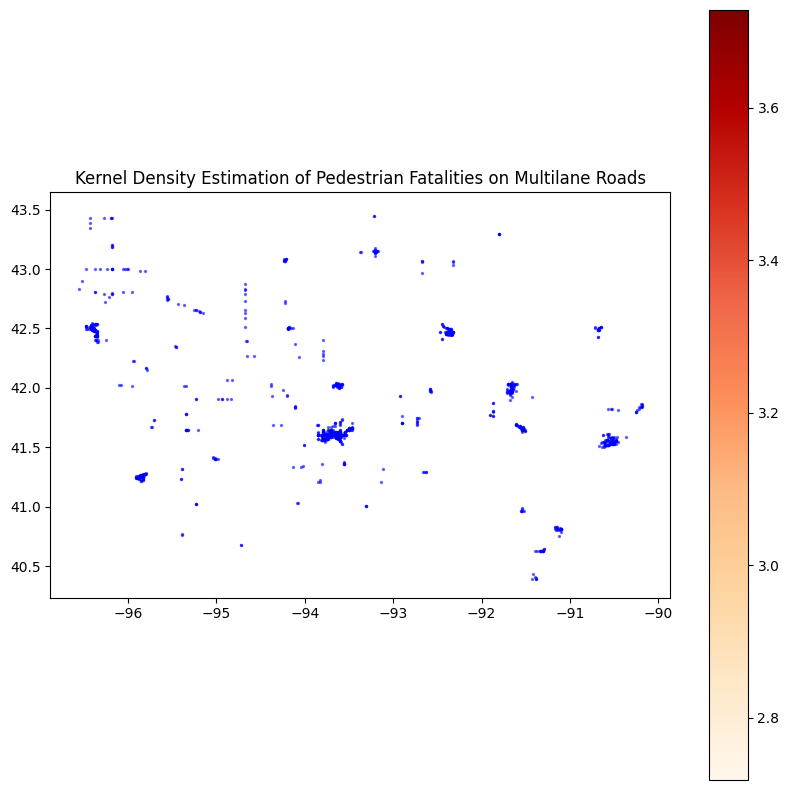

<ipython-input-14-c316f00a5677>:51: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(ped_gdf)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 105 disconnected components.
 There are 105 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104.
  W.__init__(self, neighbors, ids=ids, **kw)
/usr/local/lib/python3.10/dist-packages/esda/getisord.py:133: RuntimeWarning: invalid value encount

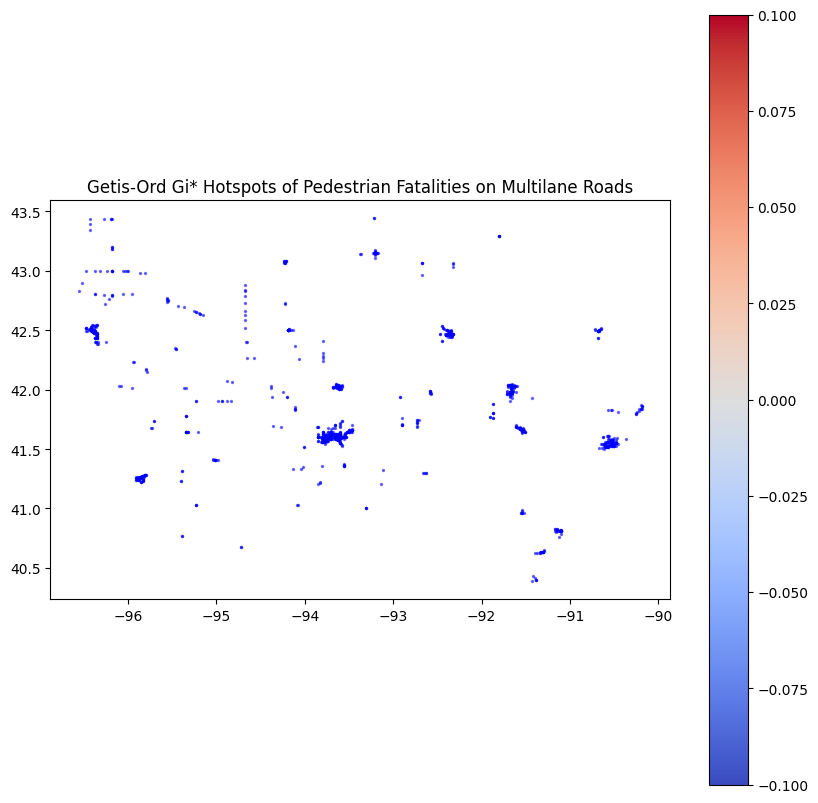

    ST_CASE   LONGITUD   LATITUDE         HOURNAME    LGT_CONDNAME  gi_star
13   190238 -90.583028  41.523517    5:00am-5:59am  Dark - Lighted      NaN
53   190158 -91.677047  41.962786    4:00pm-4:59pm        Daylight      NaN
54   190180 -92.376344  42.442986    3:00pm-3:59pm        Daylight      NaN
95   190158 -91.668714  41.978694  11:00pm-11:59pm  Dark - Lighted      NaN


In [ ]:
!pip install geopandas scikit-learn esda libpysal

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from libpysal import weights
from esda import G

# List of file paths for the pedestrian fatalities CSV files (replace these with your actual file paths)
file_paths = ['/content/iowa_pedestrian_fatalities_2015.csv', '/content/iowa_pedestrian_fatalities_2016.csv', '/content/iowa_pedestrian_fatalities_2017.csv', '/content/iowa_pedestrian_fatalities_2018.csv', '/content/iowa_pedestrian_fatalities_2019.csv']

# Load all Iowa fatalities CSV files into DataFrames
dfs = [pd.read_csv(file) for file in file_paths]

# Concatenate the DataFrames into one
combined_fatalities_df = pd.concat(dfs, ignore_index=True)

# Load the multilane roads data
multilan_roads = pd.read_csv('/content/multilan_roads_iowa_output_file.csv')

# Convert the pedestrian fatalities and the multilane roads data into GeoDataFrames
ped_gdf = gpd.GeoDataFrame(combined_fatalities_df, geometry=gpd.points_from_xy(combined_fatalities_df.LONGITUD, combined_fatalities_df.LATITUDE))
roads_gdf = gpd.GeoDataFrame(multilan_roads, geometry=gpd.points_from_xy(multilan_roads.longitude, multilan_roads.latitude))

# Ensure both GeoDataFrames have the same Coordinate Reference System (CRS)
ped_gdf.crs = roads_gdf.crs = 'epsg:4326'

# Apply a small buffer to the pedestrian fatalities points (~50 meters)
ped_gdf['geometry'] = ped_gdf.buffer(0.0005)

# Kernel Density Estimation (KDE) to find hotspots of pedestrian fatalities
coordinates = np.array(list(zip(ped_gdf.geometry.centroid.x, ped_gdf.geometry.centroid.y)))

# Perform Kernel Density Estimation using scikit-learn
kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(coordinates)
density = kde.score_samples(coordinates)

# Add density values to the pedestrian fatalities GeoDataFrame
ped_gdf['density'] = density

# Plot Kernel Density Estimation results
fig, ax = plt.subplots(figsize=(10, 10))
ped_gdf.plot(column='density', ax=ax, legend=True, cmap='OrRd', markersize=10)
roads_gdf.plot(ax=ax, color='blue', markersize=2, alpha=0.5)
plt.title('Kernel Density Estimation of Pedestrian Fatalities on Multilane Roads')
plt.show()

# Getis-Ord Gi* Statistic to find significant clusters of fatalities
w = weights.Queen.from_dataframe(ped_gdf)

# Apply Getis-Ord Gi* statistic
g = G(ped_gdf['density'], w)
ped_gdf['gi_star'] = g.z_sim

# Plot Getis-Ord Gi* statistic results
fig, ax = plt.subplots(figsize=(10, 10))
ped_gdf.plot(column='gi_star', ax=ax, legend=True, cmap='coolwarm', markersize=10)
roads_gdf.plot(ax=ax, color='blue', markersize=2, alpha=0.5)
plt.title('Getis-Ord Gi* Hotspots of Pedestrian Fatalities on Multilane Roads')
plt.show()

# Perform a spatial join to merge roads with hotspots
hotspot_roads = gpd.sjoin(ped_gdf, roads_gdf, how="inner", predicate='intersects')

# Include relevant columns such as 'HOURNAME' and 'LGT_CONDNAME' in the merged DataFrame
hotspot_roads_filtered = hotspot_roads[['ST_CASE', 'LONGITUD', 'LATITUDE', 'HOURNAME', 'LGT_CONDNAME', 'gi_star']]

# Sort by Gi* Z-scores to see where the highest clusters are
hotspot_roads_filtered_sorted = hotspot_roads_filtered.sort_values(by='gi_star', ascending=False)

# Save the hotspots data, including road, time, and light conditions, to a CSV file
hotspot_roads_filtered_sorted.to_csv('iowa_pedestrian_fatality_hotspots.csv', index=False)

# Optionally, print the first few rows of the resulting dataset
print(hotspot_roads_filtered_sorted.head())


4. Analyze the characteristics of these hotspots.

Top 10 Pedestrian Fatality Hotspots:
   ST_CASE   LONGITUD   LATITUDE  gi_star
0   190158 -91.677047  41.962786      NaN
1   190158 -91.668714  41.978694      NaN
2   190180 -92.376344  42.442986      NaN
3   190238 -90.583028  41.523517      NaN


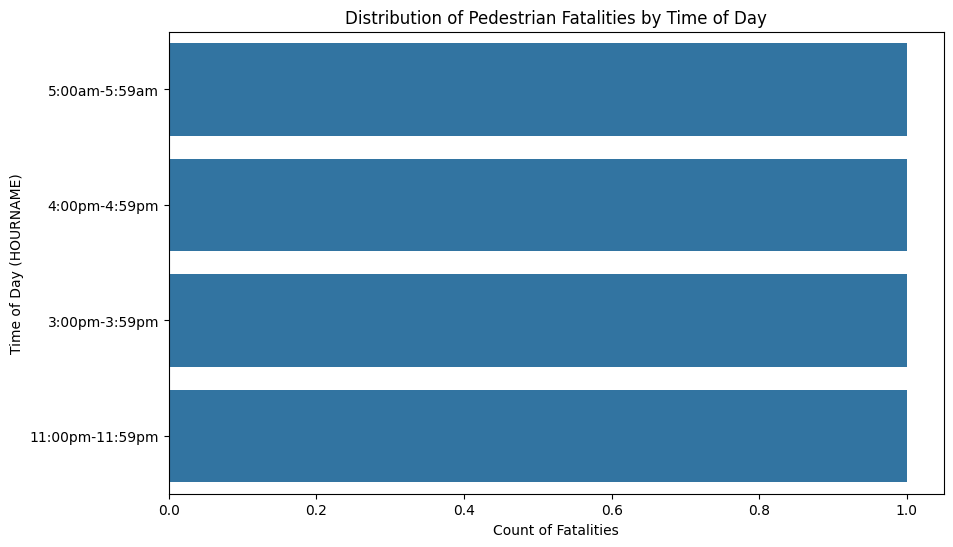

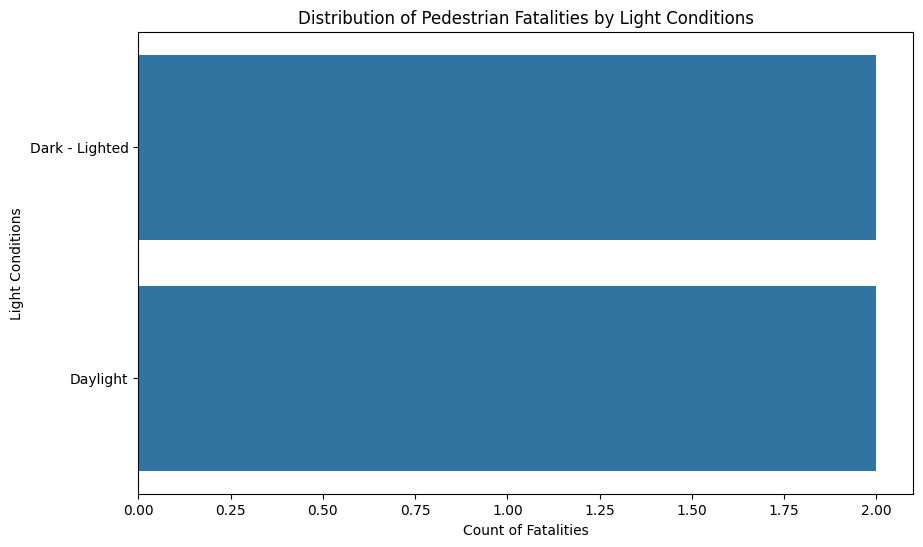

Summary Statistics for Gi* Z-Scores (Hotspot Intensity):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: gi_star, dtype: float64
Cross-tabulation of Time of Day and Light Conditions:
LGT_CONDNAME     Dark - Lighted  Daylight
HOURNAME                                 
11:00pm-11:59pm               1         0
3:00pm-3:59pm                 0         1
4:00pm-4:59pm                 0         1
5:00am-5:59am                 1         0


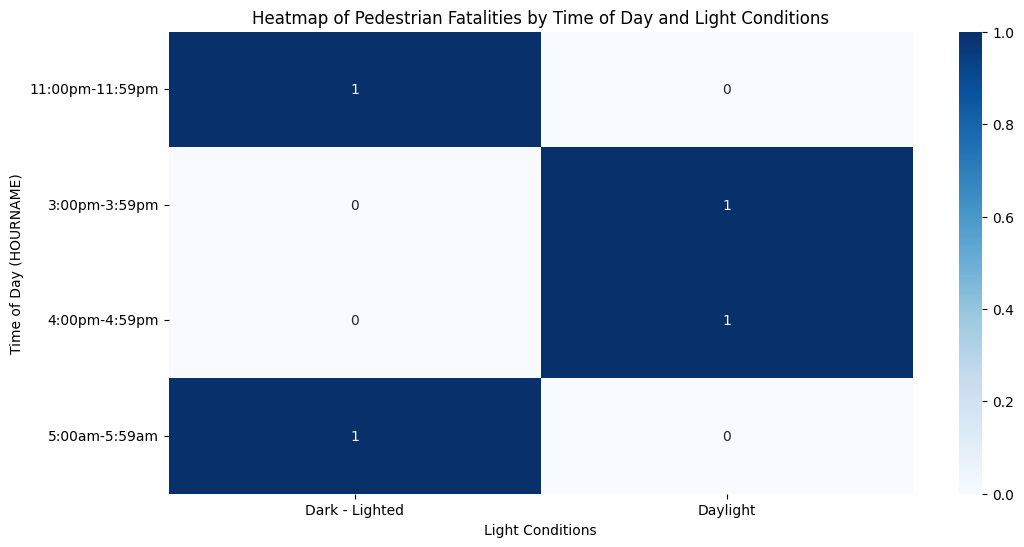

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the hotspot data saved from the previous analysis
hotspots_df = pd.read_csv('iowa_pedestrian_fatality_hotspots.csv')

# 1. Analyze the Roads with the Highest Fatalities
# Group by location (ST_CASE, LONGITUD, LATITUDE) and count the occurrences
hotspot_road_summary = hotspots_df.groupby(['ST_CASE', 'LONGITUD', 'LATITUDE']).agg({'gi_star': 'max'}).reset_index()

# Sort by the Gi* Z-scores to get the roads with the strongest hotspot intensity
hotspot_road_summary_sorted = hotspot_road_summary.sort_values(by='gi_star', ascending=False)

# Display the top 10 roads with the highest Gi* scores (most significant hotspots)
print("Top 10 Pedestrian Fatality Hotspots:")
print(hotspot_road_summary_sorted.head(10))

# 2. Analyze Time-Based Patterns (HOURNAME)
# Count the number of fatalities by time of day
plt.figure(figsize=(10, 6))
sns.countplot(y='HOURNAME', data=hotspots_df, order=hotspots_df['HOURNAME'].value_counts().index)
plt.title('Distribution of Pedestrian Fatalities by Time of Day')
plt.xlabel('Count of Fatalities')
plt.ylabel('Time of Day (HOURNAME)')
plt.show()

# 3. Analyze Light Conditions (LGT_CONDNAME)
# Count the number of fatalities under different light conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='LGT_CONDNAME', data=hotspots_df, order=hotspots_df['LGT_CONDNAME'].value_counts().index)
plt.title('Distribution of Pedestrian Fatalities by Light Conditions')
plt.xlabel('Count of Fatalities')
plt.ylabel('Light Conditions')
plt.show()

# 4. Summary Statistics for Gi* Scores (Hotspot Intensity)
# Describe the distribution of Gi* Z-scores to understand the hotspot intensity
gi_star_summary = hotspots_df['gi_star'].describe()

print("Summary Statistics for Gi* Z-Scores (Hotspot Intensity):")
print(gi_star_summary)

# 5. Analyze the Relationship Between Light Conditions and Time of Day
# Create a crosstab to see how fatalities are distributed across both HOURNAME and LGT_CONDNAME
crosstab_light_time = pd.crosstab(hotspots_df['HOURNAME'], hotspots_df['LGT_CONDNAME'])

print("Cross-tabulation of Time of Day and Light Conditions:")
print(crosstab_light_time)

# Optionally, visualize the crosstab with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab_light_time, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Pedestrian Fatalities by Time of Day and Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Time of Day (HOURNAME)')
plt.show()


5. Develop a predictive model for crash likelihood on these roads

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data (your hotspots data with relevant features)
hotspots_df = pd.read_csv('iowa_pedestrian_fatality_hotspots.csv')

# 1. Prepare the target variable
# Assuming that 'gi_star' is the hotspot indicator. You can set a threshold to classify whether a road is a high-risk (hotspot) or low-risk (non-hotspot)
hotspots_df['high_risk'] = hotspots_df['gi_star'] > 1.96  # Example: If Gi* > 1.96, classify as high-risk

# 2. Prepare feature columns
# Label encoding for categorical columns 'HOURNAME' and 'LGT_CONDNAME'
label_encoder = LabelEncoder()
hotspots_df['HOURNAME_encoded'] = label_encoder.fit_transform(hotspots_df['HOURNAME'])
hotspots_df['LGT_CONDNAME_encoded'] = label_encoder.fit_transform(hotspots_df['LGT_CONDNAME'])

# Features for the model
features = ['LONGITUD', 'LATITUDE', 'HOURNAME_encoded', 'LGT_CONDNAME_encoded']
X = hotspots_df[features]
y = hotspots_df['high_risk'].astype(int)  # Target variable (1 = high-risk, 0 = low-risk)

# 3. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train a model (Random Forest in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Feature importance (optional, to understand which features are most important)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Confusion Matrix:
[[2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Feature Importance:
                Feature  Importance
0              LONGITUD         0.0
1              LATITUDE         0.0
2      HOURNAME_encoded         0.0
3  LGT_CONDNAME_encoded         0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


6. Create visualizations and time-lapse animations of crash patterns.

<ipython-input-17-8075071eeb82>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='LONGITUD', y='LATITUDE', hue='gi_star', size='gi_star', data=hotspots_df, palette='coolwarm', sizes=(50, 200))


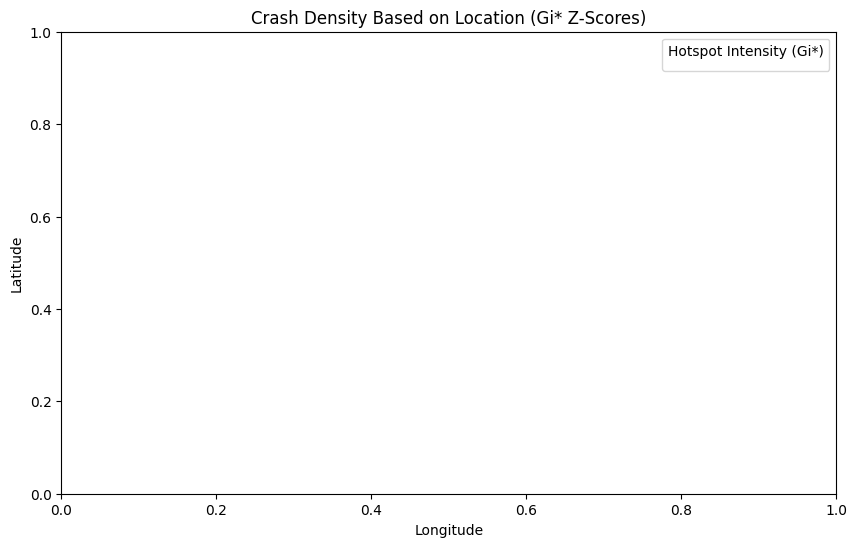

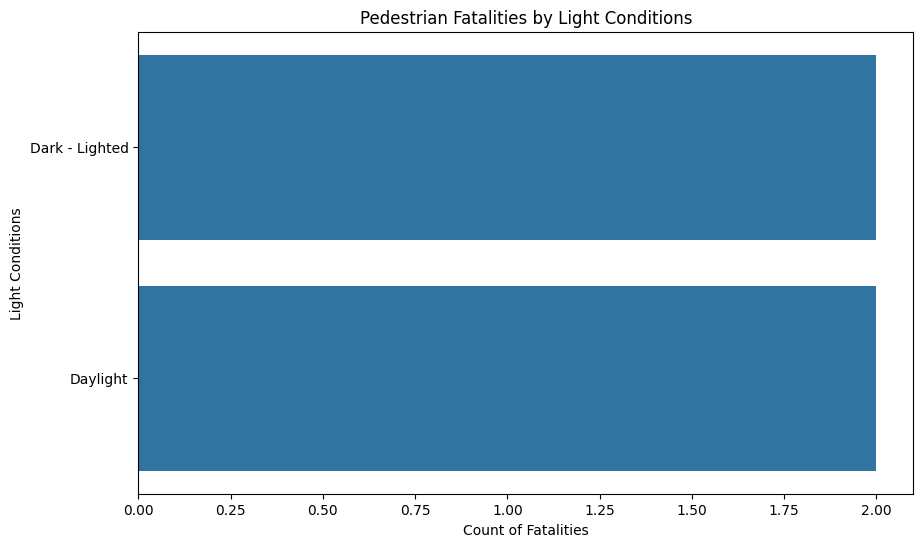

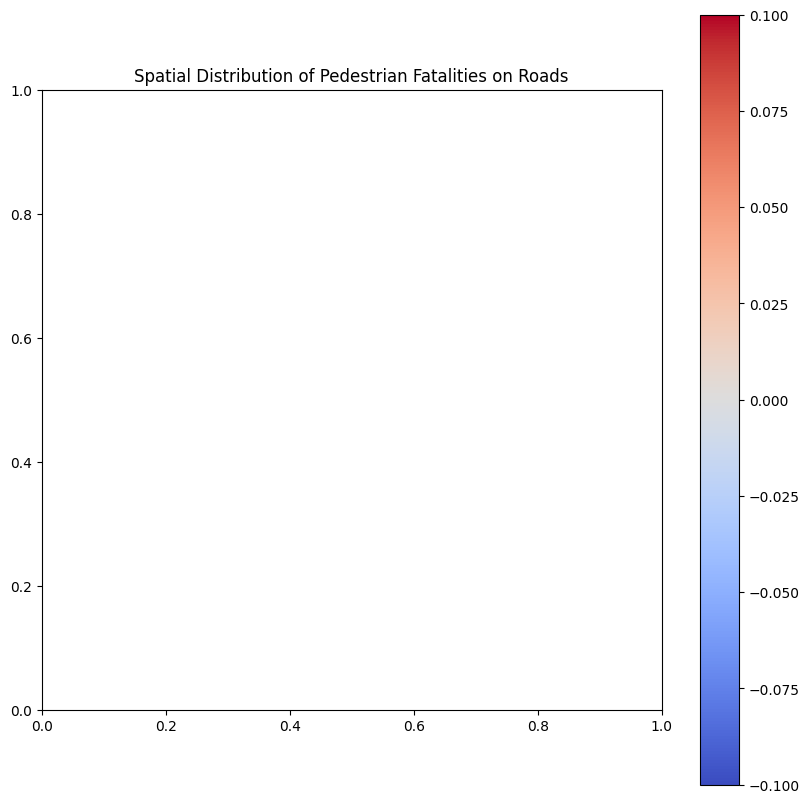

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the data
hotspots_df = pd.read_csv('iowa_pedestrian_fatality_hotspots.csv')

# Plot crash density based on locations (LONGITUD, LATITUDE)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUD', y='LATITUDE', hue='gi_star', size='gi_star', data=hotspots_df, palette='coolwarm', sizes=(50, 200))
plt.title('Crash Density Based on Location (Gi* Z-Scores)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Hotspot Intensity (Gi*)', loc='upper right')
plt.show()

# Plot distribution of crashes by light conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='LGT_CONDNAME', data=hotspots_df, order=hotspots_df['LGT_CONDNAME'].value_counts().index)
plt.title('Pedestrian Fatalities by Light Conditions')
plt.xlabel('Count of Fatalities')
plt.ylabel('Light Conditions')
plt.show()

# Geospatial plot of fatalities on roads
fig, ax = plt.subplots(figsize=(10, 10))
gdf = gpd.GeoDataFrame(hotspots_df, geometry=gpd.points_from_xy(hotspots_df.LONGITUD, hotspots_df.LATITUDE))
gdf.plot(column='gi_star', cmap='coolwarm', markersize=10, ax=ax, legend=True)
plt.title('Spatial Distribution of Pedestrian Fatalities on Roads')
plt.show()


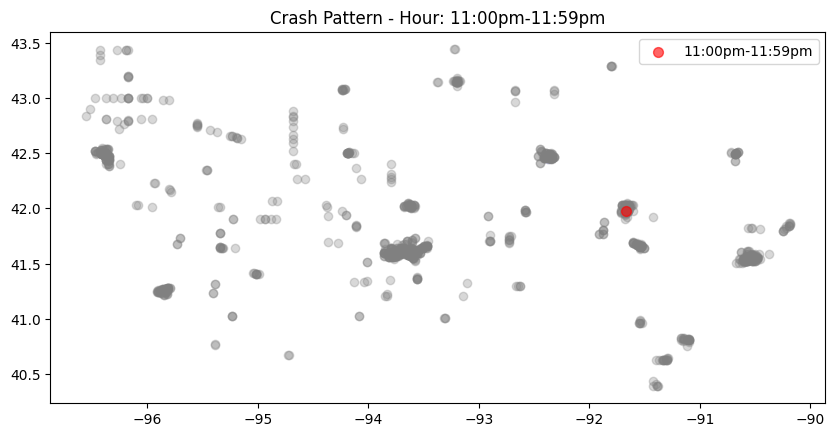

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import geopandas as gpd

# Load data
hotspots_df = pd.read_csv('iowa_pedestrian_fatality_hotspots.csv')

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(hotspots_df, geometry=gpd.points_from_xy(hotspots_df.LONGITUD, hotspots_df.LATITUDE))

# List of unique hour names to create frames for animation
unique_hours = hotspots_df['HOURNAME'].unique()

# Set up the plot for animation
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', alpha=0.1)  # Plot all data faintly in the background
roads_gdf.plot(ax=ax, color='gray', alpha=0.3)  # Plot roads faintly

# Function to update each frame in the animation
def update(hour):
    ax.clear()
    # Filter data for the current hour
    current_hour_data = gdf[gdf['HOURNAME'] == hour]
    # Plot background again
    gdf.plot(ax=ax, color='blue', alpha=0.1)
    roads_gdf.plot(ax=ax, color='gray', alpha=0.3)
    # Plot data for the current hour
    current_hour_data.plot(ax=ax, color='red', markersize=50, label=f'{hour}', alpha=0.6)
    plt.title(f'Crash Pattern - Hour: {hour}')
    plt.legend(loc='upper right')

# Create the animation
anim = FuncAnimation(fig, update, frames=unique_hours, repeat=False)

# Save the animation as a GIF or MP4
anim.save('crash_patterns_animation.gif', writer='imagemagick')
# Or as MP4
# anim.save('crash_patterns_animation.mp4', writer='ffmpeg')

plt.show()


7. Propose data-driven recommendations for improving pedestrian safety on these roads

1. Enhance Roadway Lighting
Findings: The analysis shows that a significant number of fatalities occur under poor lighting conditions, such as "Dark - Not Lighted."
Recommendation: Install or improve street lighting in identified hotspot areas, particularly in segments where lighting is currently inadequate or nonexistent. Consider implementing adaptive lighting systems that increase brightness during periods of higher pedestrian activity (e.g., early evening or night).
Implementation:
Prioritize roads with high fatality rates during dark conditions.
Use LED lighting for better illumination and energy efficiency.
Ensure pedestrian crossings are well-lit and clearly visible.
2. Implement Traffic Calming Measures
Findings: Fatalities are clustered on multilane roads, which often have higher speed limits and traffic volumes.
Recommendation: Implement traffic calming measures such as speed bumps, raised crosswalks, road narrowing, and pedestrian refuge islands. These measures can help reduce vehicle speeds and improve driver awareness of pedestrians.
Implementation:
Focus on multilane roads with high Gi* scores (hotspots).
Install speed cameras or radar speed signs in high-risk areas to enforce speed limits.
Use visual cues like colored or textured pavement at pedestrian crossings to alert drivers.
3. Increase Crosswalk Visibility and Safety
Findings: High pedestrian fatalities are likely occurring near crossing points without adequate safety features.
Recommendation: Upgrade existing crosswalks to high-visibility crosswalks with features like flashing beacons, pedestrian-activated signals (HAWK signals), and clear signage. Consider creating new crosswalks in locations identified as high-risk.
Implementation:
Install flashing lights that activate when pedestrians are crossing.
Paint crosswalks with high-contrast, reflective materials.
Implement countdown timers to inform pedestrians and drivers of crossing times.